<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/CNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  #helps in mathematical operations
import numpy.random as nr  #helps generate random number
import matplotlib.pyplot as plt  #helps in plotting of graph
import keras 
from keras.datasets import mnist  #getting the dataset
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
#from keras.optimizers import rmsprop, Adam
from keras.utils import to_categorical

In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D

In [5]:
print(keras.__version__)

2.4.3


In [6]:
#Loading the fashion mnist dataset from keras
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9


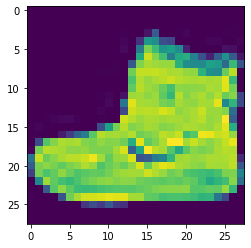

In [7]:
plt.imshow(train_X[0])
print(train_Y[0])


In [8]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [9]:
#Getting the classification classes
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

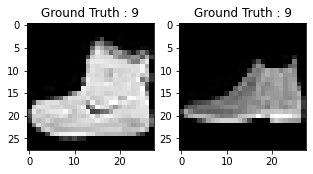

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [11]:
#reshaping the dataset
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255

In [13]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
#Dividing the dataset into training and validation dataset
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [15]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [17]:
batch_size = 64
epochs = 20
num_classes = 10

In [18]:
import keras
import keras.models as models

In [19]:

train_X.shape[1:]

(28, 28, 1)

In [20]:
model = tf.keras.Sequential()

In [21]:
#Defining the first set of convolutional layer , pooling layer and using the leakyReLU activation function
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(28, 28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))

In [22]:
#Defining the second and third set of convolutional layer , pooling layer and using the leakyReLU activation function
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))

In [23]:
model.add(tf.keras.layers.Flatten())

In [24]:
#Adding the last fully connected network and using the softmax function
model.add(tf.keras.layers.Dense(128, activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [25]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [28]:
model_train=model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 80s 107ms/step - loss: 0.0271 - accuracy: 0.9901 - val_loss: 0.5205 - val_accuracy: 0.9179
Epoch 2/20
750/750 [==============================] - 80s 107ms/step - loss: 0.0221 - accuracy: 0.9915 - val_loss: 0.5151 - val_accuracy: 0.9195
Epoch 3/20
750/750 [==============================] - 80s 106ms/step - loss: 0.0255 - accuracy: 0.9909 - val_loss: 0.5454 - val_accuracy: 0.9100
Epoch 4/20
750/750 [==============================] - 80s 107ms/step - loss: 0.0249 - accuracy: 0.9912 - val_loss: 0.5466 - val_accuracy: 0.9135
Epoch 5/20
750/750 [==============================] - 80s 107ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.5308 - val_accuracy: 0.9237
Epoch 6/20
750/750 [==============================] - 80s 107ms/step - loss: 0.0222 - accuracy: 0.9922 - val_loss: 0.5315 - val_accuracy: 0.9184
Epoch 7/20
750/750 [==============================] - 79s 106ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.4997 - val_ac

In [29]:
#Testing the accuracy and loss of the model
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.7060234546661377
Test accuracy: 0.920199990272522


In [30]:
model_train.history

{'accuracy': [0.9900624752044678,
  0.9914791584014893,
  0.9908750057220459,
  0.9911666512489319,
  0.9932083487510681,
  0.9921666383743286,
  0.9926875233650208,
  0.9926041960716248,
  0.9929791688919067,
  0.9946874976158142,
  0.9936249852180481,
  0.9932291507720947,
  0.9935625195503235,
  0.992479145526886,
  0.9947083592414856,
  0.9939583539962769,
  0.9949374794960022,
  0.9931041598320007,
  0.9945833086967468,
  0.9933124780654907],
 'loss': [0.02705761417746544,
  0.022122930735349655,
  0.02547304704785347,
  0.024884101003408432,
  0.019799798727035522,
  0.022175733000040054,
  0.023097693920135498,
  0.022135185077786446,
  0.018757738173007965,
  0.015209111385047436,
  0.01939793862402439,
  0.02062576822936535,
  0.019241267815232277,
  0.02154776267707348,
  0.016872894018888474,
  0.018279844895005226,
  0.014550730586051941,
  0.021351603791117668,
  0.015130771324038506,
  0.01883024349808693],
 'val_accuracy': [0.9179166555404663,
  0.9194999933242798,
  0.9

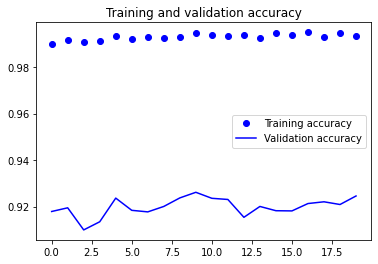

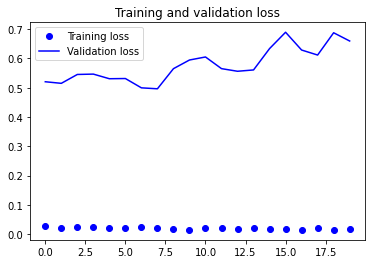

In [31]:
#Testing and plotting the acuuracy and loss for training dataset and validation dataset
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
#As we can see that Validation accuracy is low compared to training accuracy so we ca say the model is overfitted. So now we will drop some neurons after each set of layers which do not provide much information.
fashion_model = tf.keras.Sequential()
fashion_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.4))
fashion_model.add(tf.keras.layers.Flatten())
fashion_model.add(tf.keras.layers.Dense(128, activation='linear'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))           
fashion_model.add(tf.keras.layers.Dropout(0.3))
fashion_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [34]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [35]:
fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [36]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 87s 115ms/step - loss: 0.8525 - accuracy: 0.6800 - val_loss: 0.3646 - val_accuracy: 0.8624
Epoch 2/20
750/750 [==============================] - 86s 115ms/step - loss: 0.3875 - accuracy: 0.8565 - val_loss: 0.3087 - val_accuracy: 0.8861
Epoch 3/20
750/750 [==============================] - 85s 114ms/step - loss: 0.3239 - accuracy: 0.8805 - val_loss: 0.2807 - val_accuracy: 0.8954
Epoch 4/20
750/750 [==============================] - 85s 114ms/step - loss: 0.3031 - accuracy: 0.8840 - val_loss: 0.2669 - val_accuracy: 0.9036
Epoch 5/20
750/750 [==============================] - 85s 113ms/step - loss: 0.2791 - accuracy: 0.8964 - val_loss: 0.2469 - val_accuracy: 0.9102
Epoch 6/20
750/750 [==============================] - 85s 113ms/step - loss: 0.2653 - accuracy: 0.9031 - val_loss: 0.2404 - val_accuracy: 0.9088
Epoch 7/20
750/750 [==============================] - 85s 113ms/step - loss: 0.2558 - accuracy: 0.9054 - val_loss: 0.2353 - val_ac

In [37]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [38]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 5s 17ms/step - loss: 0.2211 - accuracy: 0.9224


In [39]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22105254232883453
Test accuracy: 0.9223999977111816


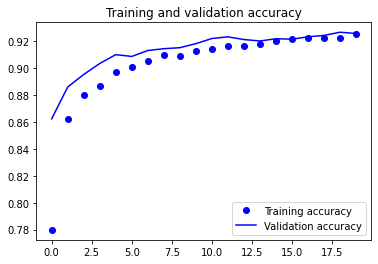

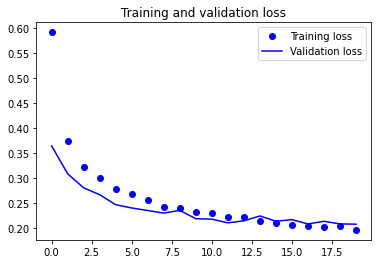

In [40]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
predicted_classes = fashion_model.predict(test_X)

In [42]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

Found 9196 correct labels


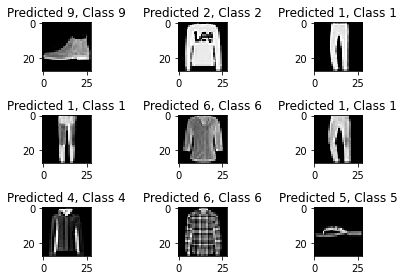

In [43]:

correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 804 incorrect labels


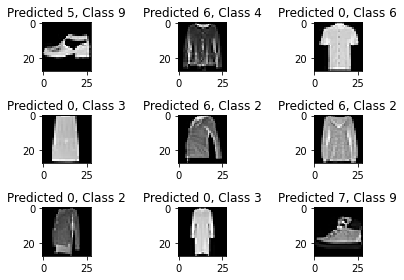

In [44]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [45]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.89      0.88      0.89      1000
     Class 3       0.94      0.91      0.92      1000
     Class 4       0.88      0.89      0.89      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.83      0.74      0.78      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

